In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/imbikramsaha/food11")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harsha16112003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imbikramsaha/food11


100%|██████████| 519M/519M [00:09<00:00, 59.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cv2
import random
import os

In [ ]:
import tensorflow.keras

In [ ]:
from keras.layers import Dense,Flatten

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
from keras.callbacks import EarlyStopping


In [ ]:
DIRECTORY = "/content/food11/food11/train"
categories = ["apple_pie","cheesecake","chicken_curry","french_fries","fried_rice","hamburger","hot_dog","ice_cream","omelette","pizza","sushi"]

In [ ]:
INPUT_SIZE =255
data = []

for category in categories:
  folders = os.path.join(DIRECTORY,category)
  label = categories.index(category)
  print(f"{category}:",label)
  for img in os.listdir(folders):
    img_arr = os.path.join(folders,img)
    img_arr = cv2.imread(img_arr)
    img_resized = cv2.resize(img_arr,(INPUT_SIZE,INPUT_SIZE))
    #plt.imshow(img_arr)
    #break
    data.append([img_resized,label])

apple_pie: 0
cheesecake: 1
chicken_curry: 2
french_fries: 3
fried_rice: 4
hamburger: 5
hot_dog: 6
ice_cream: 7
omelette: 8
pizza: 9
sushi: 10


In [ ]:
len(data)

9900

In [ ]:
random.shuffle(data)

In [ ]:
data[0]

[array([[[227, 227, 197],
         [243, 242, 212],
         [252, 251, 219],
         ...,
         [ 13,  24,  52],
         [ 31,  40,  72],
         [ 41,  50,  83]],
 
        [[255, 255, 222],
         [255, 254, 221],
         [251, 247, 213],
         ...,
         [ 41,  52,  80],
         [ 48,  58,  88],
         [ 50,  57,  90]],
 
        [[245, 238, 201],
         [239, 231, 195],
         [227, 217, 182],
         ...,
         [ 51,  59,  88],
         [ 45,  53,  83],
         [ 42,  50,  80]],
 
        ...,
 
        [[ 12,  11,  23],
         [ 14,  13,  28],
         [ 26,  28,  46],
         ...,
         [ 11,   9,   9],
         [ 10,   8,   8],
         [ 12,  10,  10]],
 
        [[ 13,  11,  31],
         [ 40,  39,  61],
         [ 46,  48,  73],
         ...,
         [ 10,   7,   9],
         [ 11,   8,  10],
         [ 12,   9,  11]],
 
        [[ 48,  45,  70],
         [ 77,  76, 104],
         [ 49,  51,  80],
         ...,
         [ 11,   7,  12],
  

In [ ]:
x = []
y = []

for featuers,label in data:
  x.append(featuers)
  y.append(label)

In [ ]:
len(x)

9900

In [ ]:
len(y)

9900

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(9900, 255, 255, 3)

In [ ]:
y.shape

(9900,)

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(7920, 255, 255, 3)

In [ ]:
x_test.shape

(1980, 255, 255, 3)

In [ ]:
y_train.shape

(7920,)

In [ ]:
y_test.shape

(1980,)

In [ ]:
#x_train = x_train/255
#x_test = x_test/255

In [ ]:
#vgg19 model

In [ ]:
vgg = VGG19(input_shape=(255,255,3),weights="imagenet",include_top = False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layers in vgg.layers:
  layers.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(11,activation="softmax")(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=vgg.inputs,outputs = prediction)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 255, 255, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 127, 127, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 127, 127, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 63, 63, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,300,363 (77.44 MB)

 Trainable params: 275,979 (1.05 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
!pip install pydot

In [ ]:
from tensorflow.keras.utils import plot_model

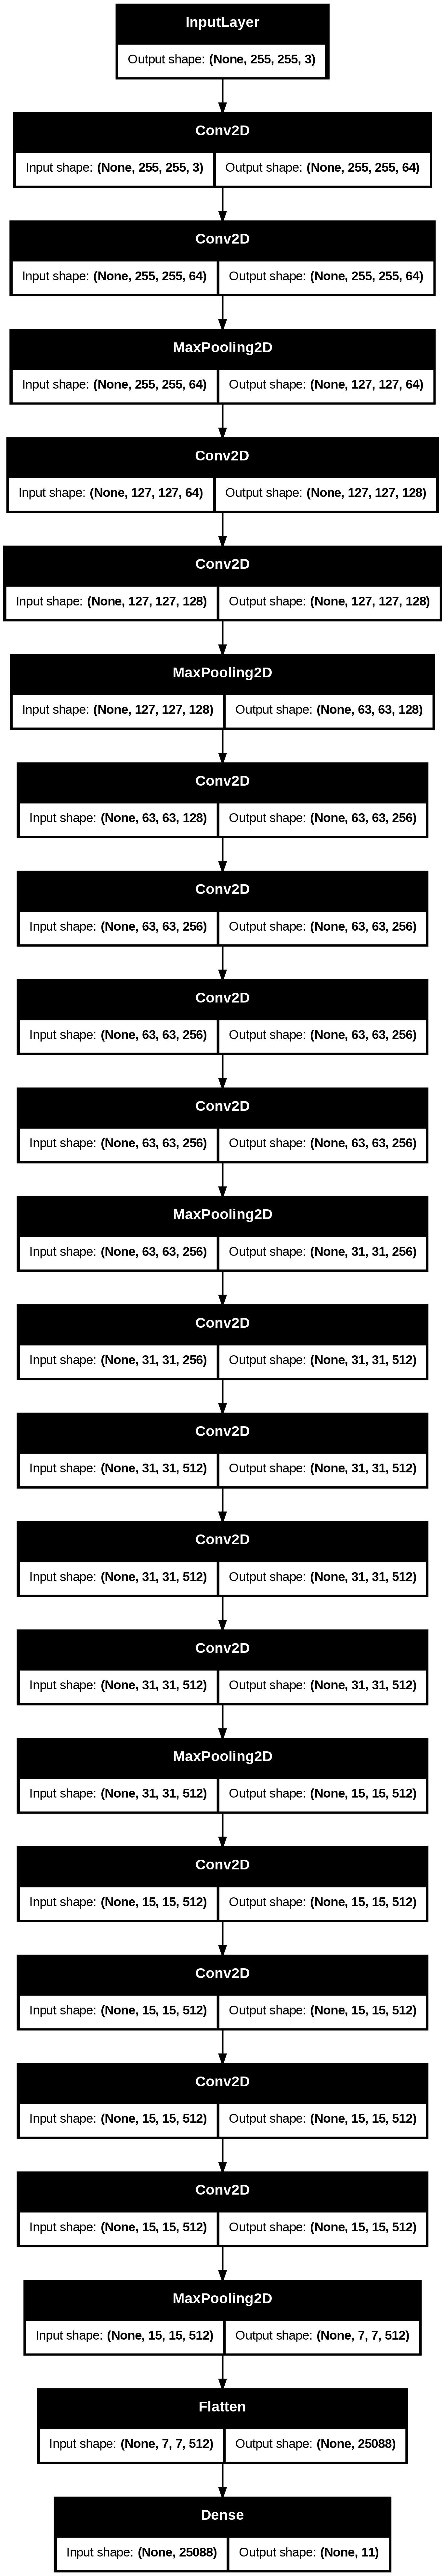

In [ ]:
# visualizing model
plot_model(model=model,show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(monitor="accuracy",mode="max",verbose=1,patience =5)

In [ ]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics =["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255,
                                   #share_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory("/content/food11/food11/train",
                                                 target_size=(255,255,3),
                                                 batch_size = 32,
                                                 class_mode="categorical")
test_set = test_datagen.flow_from_directory("/content/food11/food11/test",
                                            target_size=(255,255,3),
                                            batch_size = 32,
                                            class_mode="categorical")



Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.


In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.1,callbacks=[early_stopping],batch_size=30,shuffle=True)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 255, 255, 3))
  warnings.warn(msg)


238/238 ━━━━━━━━━━━━━━━━━━━━ 111s 383ms/step - accuracy: 0.5494 - loss: 18.2551 - val_accuracy: 0.6553 - val_loss: 19.6610
Epoch 2/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 73s 306ms/step - accuracy: 0.8909 - loss: 3.6106 - val_accuracy: 0.6957 - val_loss: 20.2401
Epoch 3/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 83s 310ms/step - accuracy: 0.9365 - loss: 2.0933 - val_accuracy: 0.6843 - val_loss: 24.1010
Epoch 4/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 82s 312ms/step - accuracy: 0.9636 - loss: 1.0930 - val_accuracy: 0.6970 - val_loss: 24.7886
Epoch 5/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 78s 296ms/step - accuracy: 0.9684 - loss: 0.8879 - val_accuracy: 0.6843 - val_loss: 30.3242


In [ ]:
pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 255, 255, 3))
  warnings.warn(msg)


62/62 ━━━━━━━━━━━━━━━━━━━━ 49s 544ms/step


In [ ]:
model.evaluate(x_train,y_train)

248/248 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.9548 - loss: 1.9052


[4.567399978637695, 0.9272727370262146]

In [ ]:
pred_index = [np.argmax(x) for x in pred]

In [ ]:
pred_index

[4,
 6,
 6,
 4,
 2,
 3,
 4,
 6,
 2,
 5,
 6,
 10,
 0,
 1,
 7,
 2,
 5,
 9,
 5,
 5,
 0,
 4,
 7,
 2,
 5,
 10,
 0,
 4,
 10,
 4,
 1,
 0,
 6,
 5,
 3,
 6,
 4,
 1,
 3,
 9,
 0,
 7,
 7,
 0,
 3,
 6,
 10,
 3,
 4,
 5,
 1,
 5,
 4,
 9,
 7,
 3,
 4,
 6,
 10,
 6,
 5,
 5,
 4,
 1,
 3,
 4,
 3,
 6,
 0,
 9,
 3,
 0,
 3,
 10,
 10,
 5,
 1,
 4,
 5,
 6,
 3,
 6,
 10,
 5,
 1,
 1,
 5,
 3,
 7,
 3,
 6,
 4,
 0,
 5,
 10,
 4,
 4,
 9,
 7,
 4,
 6,
 2,
 4,
 4,
 7,
 3,
 4,
 7,
 5,
 2,
 7,
 8,
 10,
 3,
 1,
 0,
 10,
 4,
 9,
 5,
 4,
 4,
 9,
 5,
 4,
 9,
 1,
 4,
 7,
 10,
 0,
 7,
 6,
 5,
 9,
 3,
 9,
 10,
 5,
 0,
 10,
 6,
 5,
 0,
 2,
 6,
 1,
 9,
 1,
 4,
 6,
 6,
 4,
 6,
 1,
 10,
 1,
 1,
 2,
 1,
 3,
 6,
 10,
 5,
 5,
 0,
 3,
 2,
 0,
 5,
 7,
 0,
 3,
 5,
 10,
 4,
 9,
 4,
 3,
 1,
 4,
 3,
 9,
 6,
 10,
 10,
 3,
 3,
 9,
 10,
 7,
 7,
 0,
 0,
 9,
 6,
 3,
 5,
 4,
 9,
 9,
 3,
 4,
 7,
 1,
 2,
 6,
 5,
 10,
 10,
 4,
 3,
 10,
 5,
 10,
 7,
 5,
 0,
 4,
 10,
 0,
 1,
 10,
 9,
 2,
 7,
 3,
 8,
 0,
 8,
 8,
 10,
 4,
 1,
 10,
 1,
 0,
 2,
 10,
 9,
 0,
 9,
 4,

In [ ]:
# visualizing the training and testing values

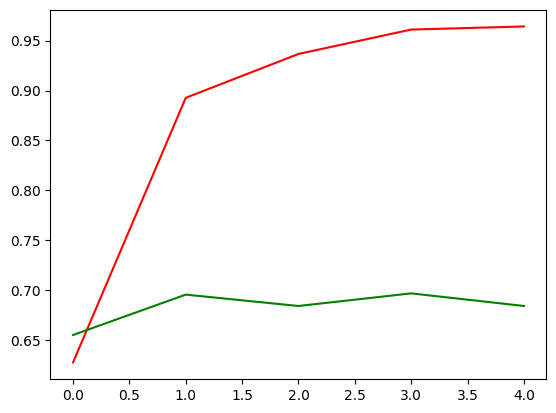

In [ ]:
acc = history.history["accuracy"]
val_accu = history.history["val_accuracy"]
epochs = range(len(acc))
plt.plot(epochs,acc,"r")
plt.plot(epochs,val_accu,"g")
plt.show()

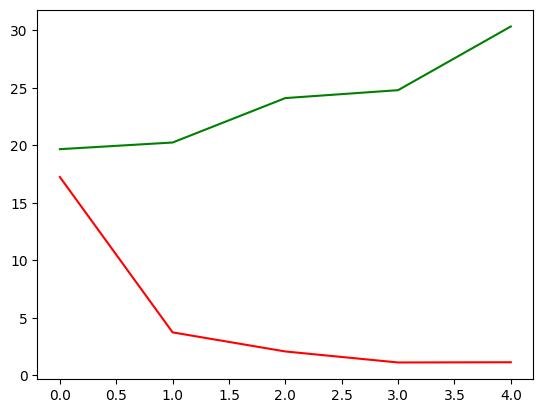

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.plot(epochs,loss,"r")
plt.plot(epochs,val_loss,"g")
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
cm = confusion_matrix(y_test,pred_index)
cm

array([[ 97,  21,   6,  12,  12,   6,   3,  11,   1,   3,   6],
       [  9, 130,   0,   3,   6,   2,   6,   6,   1,   0,   9],
       [  6,   2, 130,   4,  22,   7,   0,   5,   3,   4,   6],
       [  3,   6,   0, 171,   1,   4,   1,   2,   0,   0,   4],
       [  2,   1,   9,   1, 157,   4,   0,   3,   1,   0,   5],
       [  8,   4,   1,   4,   2, 131,   5,   4,   3,   1,   2],
       [  0,   9,   2,  15,   3,  20, 121,   5,   0,   2,  11],
       [  6,  21,   3,   5,   4,  10,   1, 125,   0,   0,  10],
       [ 28,   5,  15,   7,  32,  19,   3,   4,  51,  10,  13],
       [  5,   4,   3,   1,  15,   3,   1,   5,   2, 131,   6],
       [  4,   5,   2,   0,   5,   6,   1,   4,   0,   0, 138]])

In [ ]:
print(classification_report(y_test,pred_index))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       178
           1       0.62      0.76      0.68       172
           2       0.76      0.69      0.72       189
           3       0.77      0.89      0.82       192
           4       0.61      0.86      0.71       183
           5       0.62      0.79      0.69       165
           6       0.85      0.64      0.73       188
           7       0.72      0.68      0.70       185
           8       0.82      0.27      0.41       187
           9       0.87      0.74      0.80       176
          10       0.66      0.84      0.74       165

    accuracy                           0.70      1980
   macro avg       0.72      0.70      0.69      1980
weighted avg       0.72      0.70      0.69      1980



In [ ]:
print(accuracy_score(y_test,pred_index))

0.697979797979798


In [ ]:
import seaborn as sns

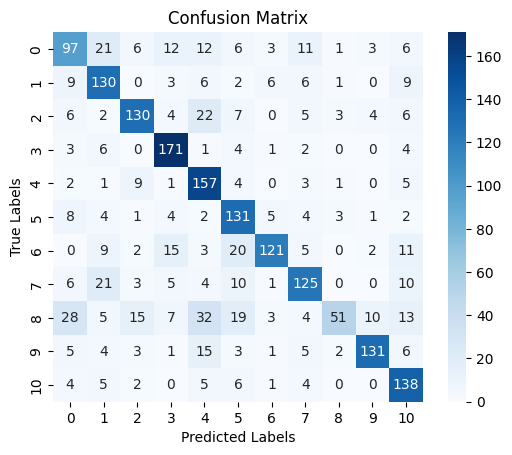

In [ ]:
sns.heatmap(cm,annot=True,square=True,cmap="Blues",fmt=".0f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()